In [1]:
"""
@file: example code in "Data Science From Scratch"
"""

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math
import itertools
import random
import tqdm
import numpy
import matplotlib.image as mpimg
from sklearn import datasets

## 1. Linear Algebra

### Vector

In [2]:
def v_add(v, w):
    return [ x + y for x, y in zip(v, w) ]

In [3]:
assert v_add([1, 2, 3], [3, 4, 5]) == [4, 6, 8]

In [4]:
def v_subtract(v, w):
    return [ x - y for x, y in zip(v, w) ]

In [5]:
assert v_subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

In [6]:
def v_sum(vectors):
    d = len(vectors[0])
    return [ sum(v[i] for v in vectors) for i in range(d) ]

In [7]:
assert v_sum([[1, 2], [3, 4]]) == [4, 6]

In [8]:
def scalar_multiply(c, v):
    return [ c * v_i for v_i in v ]

In [9]:
assert scalar_multiply(2, [1, 4, 5]) == [2, 8, 10]

In [10]:
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, v_sum(vectors))

In [11]:
assert vector_mean([[1, 2], [3, 4], [5 , 6]]) == [3, 4]

In [12]:
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [13]:
assert dot([2, 3, 4], [5, 2, 1]) == 20

In [14]:
def sum_of_squares(v):
    return dot(v, v)

In [15]:
assert sum_of_squares([1, 2, 3]) == 14

In [16]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [17]:
assert magnitude([3, 4]) == 5

In [18]:
def distance(v, w):
    return magnitude(v_subtract(v, w))

In [19]:
assert distance([3, 4], [2, 4]) == 1

In [20]:
def squared_distance(v, w):
    return sum_of_squares(v_subtract(v, w))

In [21]:
assert squared_distance([3, 4], [5, 1]) == 13

### Matrix

In [22]:
def shape(A):
    return len(A), len(A[0])

In [23]:
assert shape([[2,3,4], [1, 2, 3]]) == (2, 3)

In [24]:
def get_row(A, i):
    return A[i]

In [25]:
def get_column(A, j):
    return [ A_i[j] for A_i in A ]

In [26]:
def make_matrix(num_rows, num_cols, entry_fn):
    
    return [ [entry_fn(i, j) for j in range(num_cols)] for i in range(num_rows) ]    

In [27]:
make_matrix(2, 3, lambda i, j: i+j)

[[0, 1, 2], [1, 2, 3]]

In [28]:
def identity_matrix(n):
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [29]:
identity_matrix(3)

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

## 2. Statistics

In [30]:
"""
Example
"""
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]


In [31]:
def mean(xl):
    return sum(xl) / len(xl)

In [32]:
mean(num_friends)

7.333333333333333

In [33]:
def _median_odd(xs):
    return sorted(xs)[len(xs) // 2]

In [34]:
def _median_even(xs):
    i = len(xs) // 2
    sorted_xs = sorted(xs)
    return (sorted_xs[i] + sorted_xs[i - 1]) / 2

In [35]:
def median(xs):
    return _median_even(xs) if len(xs) % 2 == 0 else _median_odd(xs)

In [36]:
assert median([1, 10, 2, 9, 5]) == 5

In [37]:
assert median([1, 10, 2, 9]) == (2 + 9) / 2

In [38]:
def quantile(xs, p):
    p_index = int(len(xs) * p)
    return sorted(xs)[p_index]

In [39]:
assert quantile(num_friends, 0.1) == 1

In [40]:
def mode(x):
    counts = Counter(x)
    max_value = max(counts.values())
    return [ x_i for x_i, count in counts.items() if count == max_value ]

In [41]:
assert set(mode(num_friends)) == {1, 6}

In [42]:
def data_range(x):
    return max(x) - min(x)

In [43]:
data_range(num_friends)

99.0

In [44]:
def de_mean(x):
    x_bar = mean(x)
    return [ x_i - x_bar for x_i in x ]

In [45]:
def variance(x):
    return sum_of_squares(de_mean(x)) / (len(x) - 1)

In [46]:
assert 81.54 < variance(num_friends) < 81.55

In [47]:
def standard_deviation(xs):
    return math.sqrt(variance(xs))

In [48]:
assert 9.02 < standard_deviation(num_friends) < 9.04

In [49]:
def IQR(xs):
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [50]:
assert IQR(num_friends) == 6

In [51]:
def covariance(xs, ys):
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [52]:
assert 22.42 < covariance(num_friends, daily_minutes) < 22.43

In [53]:
def correlation(xs, ys):
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0

In [54]:
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25

## 3. Gradient Descent

In [55]:
def difference_quotient(f, x, h):
    """
    how f(x) changes when we make a very small change to x
    """
    return (f(x + h) - f(x)) / h

In [56]:
"""
when f is a function of many variables, it has multiple partial derivatives, 
each indicating how f changes when we make small changes in just one of the input variables
"""
def partial_difference_quotient(f, v, i, h):
    w = [ v_i + (h if j == i else 0) for j, v_i in enumerator(v)]
    
    return (f(w) - f(v)) / h

### Linear Gradient

In [57]:
def linear_gradient(x, y, theta):
    """
    the derivative of least square with respect to alpha and beta, respectively
    gradient for a single data point
    """
    
    slope, intercept = theta

    error = y - (slope * x + intercept)
    
    return [ -2 * error * x, -2 * error ]

### Gradient Step

In [58]:
def gradient_step(v, gradient, step_size):
    step = scalar_multiply(step_size, gradient)

    return v_subtract(v, step)

### Gradient Descent Algorithm

In [146]:
"""
Example: Gradient Descent
"""

inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

# start with random values
theta = [ random.random(), random.random() ]

learning_rate = 0.00001

with tqdm.trange(1500) as t:
    for _ in t:
        grad = v_sum([ linear_gradient(x, y, theta) for x, y in inputs ])
        theta = gradient_step(theta, grad, learning_rate)
        
        loss = sum( (y_i - theta[0] * x_i - theta[1])**2 for x_i, y_i in inputs)
        t.set_description(f"loss: {loss:.3f}")

theta

loss: 5.913: 100%|██████████| 1500/1500 [00:05<00:00, 288.37it/s]  


[19.999853937255416, 4.756805442544874]

### Stochastic Gradient Descent Algorithm

In [147]:
"""
Example: Stochastic Gradient Descent

One drawback of the preceding approach is that we had to evaluate the gradients on the whole data set.
"""

learning_rate = 0.001
for epoch in range(100):
     for x, y in inputs:    
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, learning_rate)

print(theta)

[20.000060908706217, 4.9969682639426365]


### Mini-batch Gradient Descent Algorithm

In [148]:
"""
Example: Minibatch Gradient Descent

One drawback of the preceding approach is that we had to evaluate the gradinets on the whole data set.
"""

def minibatches(dataset, size, shuffle=False):
    batch_start = [ start for start in range(0, len(dataset), size) ]
    
    if shuffle: 
        random.shuffle(batch_start)

    for start in batch_start:
        end = start + size
        yield dataset[start:end]


learning_rate = 0.001
for epoch in range(1000):
    for batch in minibatches(inputs, 100):
        grad = vector_mean([ linear_gradient(x, y, theta ) for x, y in batch ])
        theta = gradient_step(theta, grad, learning_rate)
        
print(theta)

[19.999999753921177, 4.999590278608121]


## 4. Regression

In [60]:
def predict(w, b, x):
    return w * x + b

In [61]:
def error(w, b, x, y):
    return y - predict(w, b, x)

In [62]:
def sum_of_squared_error(w, b, x, y):
    """
    sum of squared error, linear regression
    """
    return sum( error(w, b, x_i, y_i)**2 for x_i, y_i in zip(x, y))

### Ordinary Least Square

In [63]:
def ordinary_least_square(x, y):
    """
    w = (A^TA)^-1A^Ty
    A = [[1, x_1], [1, x_2], ... [1, x_n]]

    has this solution if A^TA is positive definite matrix
    """

    w = covariance(x, y) / variance(x)
    
    b = mean(y) - w * mean(x)
    
    return w, b

In [69]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

assert ordinary_least_square(x, y) == (3, -5)

### Using Gradient Descent

In [70]:
"""
Example
"""

outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]


In [71]:
theta = [ random.random(), random.random() ]

learning_rate1 = 0.00001

with tqdm.trange(10000) as t:
    for _ in t:
        alpha, beta = theta

        # total gradient of all dataset
        grad = v_sum([ linear_gradient(x_i, y_i, theta) for x_i, y_i in zip(num_friends_good, daily_minutes_good) ])

        loss = sum_of_squared_error(alpha, beta, num_friends_good, daily_minutes_good)
        t.set_description(f"loss: {loss:.3f}")

        # update parameter
        theta = gradient_step(theta, grad, learning_rate1)

theta

loss: 13196.619: 100%|██████████| 10000/10000 [00:39<00:00, 254.69it/s]


[0.9038659666918994, 22.947552150153584]

### R-squared

In [72]:
def r_squared(w, b, x, y):
    """
    metric: 1 - SS(fit) / SS(mean)
    """
    variation_to_mean = sum(y_i**2 for y_i in de_mean(y))

    return 1 - (sum_of_squared_error(w, b, x, y) / variation_to_mean)

In [73]:
w, b = ordinary_least_square(num_friends_good, daily_minutes_good)

r_squared(w, b, num_friends_good, daily_minutes_good)

0.3291078377836305

### D-dimensional

In [74]:
"""
The model: y_i = \alpha + \beta x_i = \alpha + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_k x_k

beta = [ \alpha, \beta_1, \beta_2, ..., \beta_k ]

x_i = [ 1, x_1, x_2, ..., x_k ]

Example of x_i
[1,    # constant term
 49,   # number of friends
 4,    # work hours per day
 0]    # doesn't have PhD”
"""

def predict_m(x, beta):
    return dot(beta, x)

def error_m(x, y, beta):
    return y - predict_m(x, beta)

def squared_error_m(x, y, beta):
    return error_m(x, y, beta)**2

def r_squared_m(xs, ys, beta):
    """
    How good is our model
    """
    variation_to_mean = sum(y_i**2 for y_i in de_mean(ys))

    return 1 - sum(squared_error_m(x, y, beta) for x, y in zip(xs, ys)) / variation_to_mean

In [75]:
def squared_error_gradient(x, y, beta):
    """
    gradient for a single data point(D-dimensional)
    """
    return scalar_multiply(-2 * error_m(x, y, beta), x)



x = [1, 2, 3]
y = 30
beta = [4, 4, 4]  # so prediction = 4 + 8 + 12 = 24”
assert squared_error_gradient(x, y, beta) == [-12, -24, -36]

In [77]:
"""
Using Gradient Descent
"""
def least_square_gradient(X, y, eta = 0.001, num_steps=1000):
    beta = [random.random(), random.random(), random.random(), random.random()]

    with tqdm.trange(num_steps) as t:
        for _ in t:
            grad_beta = v_sum([ squared_error_gradient(x, y, beta) for x, y in zip(X, y) ])
            beta = gradient_step(beta, grad_beta, eta)

    return beta

In [78]:
"""
Example: 
"""
inputs = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

beta = least_square_gradient(inputs, daily_minutes_good, 0.000045, 5000)

print(beta)

r_squared_m(inputs, daily_minutes_good, beta)

100%|██████████| 5000/5000 [00:03<00:00, 1576.81it/s]

[30.558603111907885, 0.9735463229277417, -1.8642836251770607, 0.9392002279789685]


0.680010501235204

### Regularization

In [79]:
"""
Regularization is an approach we add to the error term a penalty
that gets larger as beta gets larger.

The more importance we place on the penalty term, the more we discourage large coefficents.
"""
def ridge_penalty(alpha, beta):
    """
    Ridge Regularization: L2
    """
    return alpha * dot(beta[1:], beta[1:])

In [80]:
def lasso_penalty(alpha, beta):
    """
    Lasso Regularization: L1
    """
    return alpha * sum(abs(beta_i) for beta_i in beta)

In [81]:
def squared_error_m_ridge(x, y, beta, alpha):
    """
    Loss function with Ridge Penalty
    """
    return squared_error_m(x, y, beta) + ridge_penalty(alpha, beta)


In [82]:
def ridge_penaly_gradient(alpha, beta):
    """
    Ridge Penalty Gradient
    """
    return [0] + [ 2 * alpha * beta_i for beta_i in beta[1:] ]

In [83]:
def squared_error_ridge_gradient(x, y, beta, alpha):
    """
    Total Loss Gradient with Ridge
    """
    return v_add(squared_error_gradient(x, y, beta), ridge_penaly_gradient(alpha, beta))

In [84]:
"""
Using Gradient Descent
"""
def least_square_gradient_ridge(X, y, alpha, eta = 0.001, num_steps=1000):
    beta = [random.random(), random.random(), random.random(), random.random()]

    with tqdm.trange(num_steps) as t:
        for _ in t:
            grad_beta = v_sum([ squared_error_ridge_gradient(x, y, beta, alpha) for x, y in zip(X, y) ])
            beta = gradient_step(beta, grad_beta, eta)
    return beta

In [85]:
"""
Example:
"""

initial_beta = [0, 0.1, 1]
beta_list = [ least_square_gradient_ridge(inputs, daily_minutes_good, beta_i, 0.000045, 5000) 
             for beta_i in initial_beta ]

# [30.51, 0.97, -1.85, 0.91]
# [30.8, 0.95, -1.83, 0.54]
# [30.6, 0.90, -1.68, 0.10]
for i, beta in enumerate(beta_list):
    print('alpha=',  initial_beta[i])
    print('   ', beta)
    print('   ', r_squared_m(inputs, daily_minutes_good, beta))


100%|██████████| 5000/5000 [00:04<00:00, 1019.34it/s]

alpha= 0
    [30.558140257813314, 0.9735699278790553, -1.8642665582764695, 0.9395629731511045]
    0.6800104775308289
alpha= 0.1
    [30.833558922741897, 0.9515240238771543, -1.846828075358403, 0.5478197848620315]
    0.679744139486858
alpha= 1
    [30.66730795651854, 0.9064236302338317, -1.6918493982932845, 0.0905373880906786]
    0.6755909866384409


## 5. Logistic Regression

### Binary Classification

In [97]:
def logistic(x):
    return 1 / (1 + math.exp(-x))


def _negative_log_likelihood(x, y, beta):
    """
    likelihood for a single point
    """
    if y == 1:
        return -math.log(logistic(dot(beta, x)))
    else:
        return -math.log(1 - logistic(dot(beta, x)))

    
def negative_log_likelihood(xs, ys, beta):
    """
    likelihood for all points
    """
    return sum(_negative_log_likelihood(x, y, beta) for x, y in zip(xs, ys))



def _negative_log_partial_j(x, y, beta, j):
    """
    maximum the likelihood using gradient descent

    return the derivative of log likelihood with respect to w_j
    """
    return -(y - logistic(dot(beta, x))) * x[j]


def _negative_log_gradient(x, y, beta):
    """
    return the vector gradient of w_1, w_2,...w_j
    """
    return [ _negative_log_partial_j(x, y, beta, j) for j in range(len(beta)) ]



def negative_log_gradient(xs, ys, beta):
    """
    the gradient of all train data
    """
    return v_sum([ _negative_log_gradient(x, y, beta) for x, y in zip(xs, ys) ])



In [98]:
"""
Example: 
    input: [experience, salary, paid_account]
    label: {0, 1}
        0 - no premium account, 
        1 premium account
"""

tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]

data = [list(row) for row in tuples]

xs = [ [1] + p[:2] for p in data ] # [1, experience, salary]
ys = [ p[2] for p in data ] # paid_account


def scale(data):
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data]) for i in range(dim)]

    return means, stdevs

def rescale(data):
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled


X_train, y_train, X_test, y_test = train_test_split(rescale(xs), ys, 0.33)

logistic_learning_rate = 0.01

random.seed(0)
logistic_beta = [random.random() for _ in range(len(X_train[0]))]

with tqdm.trange(5000) as t:
    for epoch in t:
        logistic_beta = gradient_step(
            logistic_beta, 
            negative_log_gradient(X_train, y_train, logistic_beta), 
            logistic_learning_rate
        )

logistic_beta


100%|██████████| 5000/5000 [00:04<00:00, 1019.97it/s]


[-1.9928214958685053, 4.685878208818972, -4.410521510785045]

In [74]:
"""
transform rescaled beta to normal beta
"""

means, std = scale(xs)

[ 
    logistic_beta[0] - logistic_beta[1] * means[1] / std[1] - logistic_beta[2] * means[2] / std[2],
    logistic_beta[1] / std[1], 
    logistic_beta[2] / std[2] 
]


[8.740962020649306, 1.6498935546646993, -0.0002852534063108755]

In [75]:
"""
measurement on testing data
"""

tp = fp = tn = fn = 0

for x_i, y_i in zip(X_test, y_test):
    predicted_prob = logistic(dot(logistic_beta, x_i))

    if y_i == 1 and predicted_prob >= 0.5:
        tp += 1
    elif y_i == 1:
        fn += 1
    elif predicted_prob < 0.5:
        tn += 1
    else:
        fp += 1

precision(tp, fp, fn, tn), recall(tp, fp, fn, tn) 

(0.7647058823529411, 0.8125)

### Multinomial 

In [126]:
"""
General approach

x \in R^D: x = [ x_1, x_2, ..., x_D ] 

y \in R^K: 1-of-k representation

"""

def softmax(y, ys):
    """
    transform continuous outputs to probability
    """
    return math.exp(y) / sum(math.exp(y_i) for y_i in ys)


def _m_negative_log_likelihood(x, y, beta, labels):
    """
    likelihood for a single point over K outputs

    @param beta: 
        a list of D-dimensional vector(K-array), one weight for each class_k
        [ [w_1, w_2, ..., w_D], [w_1, w_2, ..., w_D], ...]
    """

    predicted_y_over_k = [ dot(beta_i, x) for beta_i in beta ]

    return math.log(softmax(dot(beta[labels.index(y)], x), predicted_y_over_k))


def m_negative_log_likelihood(xs, ys, beta, labels):
    """
    likelihood for all points

    @param beta: a list of D-dimensional vector(K-array)
    @param labels: set of class labels, the index is corresponding to the index of beta
    """

    return sum(_m_negative_log_likelihood(x, y, beta, labels) for x, y in zip(xs, ys))


def _m_negative_log_partial_k(x, y, beta_k, beta, label):
    """
    maximum the likelihood using gradient descent

    return the derivative of log likelihood with respect to w_j
    """
    
    predicted_y_over_k = [ dot(beta_i, x) for beta_i in beta ]

    w_k = []
    for j in range(len(beta_k)):
        if y == label: # y is in class_k
            w_kj = -(1 - softmax(dot(beta_k, x), predicted_y_over_k)) * x[j]

        else: 
            w_kj = softmax(dot(beta_k, x), predicted_y_over_k) * x[j]

        w_k.append(w_kj)

    return w_k


def _m_negative_log_gradient(x, y, beta, labels):
    """
    return the vector gradient of [ [w_1, w_2,...w_d], .... ] for a single point
    """
    return [ _m_negative_log_partial_k(x, y, beta_k, beta, label) for beta_k, label in zip(beta, labels) ]



def m_negative_log_gradient(xs, ys, beta, labels):
    """
    the gradient of all train data
    """
    xs_w = [ _m_negative_log_gradient(x, y, beta, labels) for x, y in zip(xs, ys) ]
    
    return [ v_sum([ x_w[i] for x_w in xs_w ]) for i in range(len(labels))]


In [129]:
"""
the same Example
"""

random.seed(0)
m_labels = np.unique(y_train)
m_d = len(X_train[0])
m_logistic_beta = [ [random.random() for _ in range(m_d)] for k in range(len(m_labels)) ]

with tqdm.trange(5000) as t:
    for epoch in t:
        delta = m_negative_log_gradient(X_train, y_train, m_logistic_beta, m_labels)
        
        for i in range(len(delta)):
            m_logistic_beta[i] = gradient_step(m_logistic_beta[i], delta[i], logistic_learning_rate)

m_logistic_beta

100%|██████████| 5000/5000 [00:17<00:00, 281.27it/s]


[[1.5480800488432631, -1.708324542255063, 2.618013614533175],
 [-0.4447414470252569, 2.9775536665639555, -1.792507896251915]]

In [130]:
"""
measurement on testing data
"""

tp = fp = tn = fn = 0
for x_i, y_i in zip(X_test, y_test):
    m_predicted_y_over_k = [ dot(beta_i, x_i) for beta_i in m_logistic_beta ]

    m_predicted_prob = [ softmax(dot(beta_i, x_i), m_predicted_y_over_k) for beta_i in m_logistic_beta ]

    m_label = np.argmax(m_predicted_prob)

    if y_i == 1 and y_i == m_label:
        tp += 1
    elif y_i == 1:
        fn += 1
    elif y_i == 0 and y_i == m_label:
        tn += 1
    else:
        fp += 1

precision(tp, fp, fn, tn), recall(tp, fp, fn, tn) 

(0.75, 0.8)

In [131]:
"""
Another Example using Multinominal Logistic Regression: 

iris dataset: 150 flowers, 3 types
"""

# import some data to play with
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

X_iris.shape, y_iris.shape, X_iris[0], np.unique(y_iris)

((150, 4), (150,), array([5.1, 3.5, 1.4, 0.2]), array([0, 1, 2]))

In [135]:
X_train_iris, y_train_iris, X_test_iris, y_test_iris = train_test_split(X_iris, y_iris, .2)

iris_learning_rate = 0.0001
random.seed(0)
m_labels_iris = np.unique(y_train_iris)
m_d_iris = len(X_train_iris[0])
# initialize weights
iris_logistic_beta = [ [random.random() for _ in range(m_d_iris)] for k in range(len(m_labels_iris)) ]

with tqdm.trange(5000) as t:
    for epoch in t:
        delta_iris = m_negative_log_gradient(X_train_iris, y_train_iris, iris_logistic_beta, m_labels_iris)
        for i in range(len(delta_iris)):
            iris_logistic_beta[i] = gradient_step(iris_logistic_beta[i], delta_iris[i], iris_learning_rate)

print(iris_logistic_beta)


"""
measurement on testing data
"""
num_correct = 0
for x_i, y_i in zip(X_test_iris, y_test_iris):
    m_iris_predicted_y_over_k = [ dot(beta_i, x_i) for beta_i in iris_logistic_beta ]

    m_iris_predicted_prob = [ softmax(dot(beta_i, x_i), m_iris_predicted_y_over_k) for beta_i in iris_logistic_beta ]

    m_iris_label = np.argmax(m_iris_predicted_prob)

    if y_i == m_iris_label:
        num_correct += 1

num_correct, num_correct / len(y_test_iris)

100%|██████████| 5000/5000 [00:49<00:00, 101.67it/s]

[[1.4164272646273814, 2.249145243029397, -1.6891025160451956, -0.6948005591742075], [1.3586897990743976, 0.21643304568753877, 0.6247868678845939, -0.5572720868646369], [-0.9428235366557608, -0.7193077088711867, 3.1767987032215466, 2.318988978228133]]


(28, 0.9333333333333333)

## 6. KNN

In [128]:
def raw_majority_vote(labels):
    """
    the most common label
    """
    votes = Counter(labels)

    winner, _ = votes.most_common(1)[0]
    
    return winner


def majority_vote(labels):
    """
    in case of the same votes
    """
    votes = Counter(labels)

    winner, winner_count = votes.most_common(1)[0]
    
    num_winners = len([ v for v in votes.values() if v == winner_count ])
    
    if num_winners:
        return winner
    else:
        # reduce k
        return majority_vote(labels[:-1])


def knn_classify(inputs, labels, k, x):
    # Order the labeled points from nearest to farthest
    sorted_inputs = sorted(
        [ (distance(x, point), label) for point, label in zip(inputs, labels) ], 
        key=lambda lp: lp[0]
    )

    k_nearest_labels = [ lp[1] for lp in sorted_inputs[:k] ]

    return majority_vote(k_nearest_labels)


In [129]:
"""
Example: 150 flowers, 3 types
"""

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape, y.shape, X[0], y[0]

((150, 4), (150,), array([5.1, 3.5, 1.4, 0.2]), 0)

In [133]:
X_train, y_train, X_test, y_test =  train_test_split(X, y, .2)

num_correct = 0

for test_p, test_label in zip(X_test, y_test):
    predicted_label = knn_classify(X_train, y_train, 5, test_p)
    
    if predicted_label == test_label:
        num_correct += 1

num_correct, num_correct / len(y_test)

(29, 0.9666666666666667)

## 7. Naive Bayes


### Multinomial Naive Bayes

In [408]:
import re
from collections import defaultdict
from typing import NamedTuple

def tokenize(text, unique=False):
    """
    tokenize message into  words
    """
    
    text = text.lower()

    words = re.findall("[a-z0-9']+", text)
    
    return set(words) if unique else words

assert tokenize('Data science is science') == ['data', 'science', 'is', 'science']


class Message(NamedTuple):
    text: str
    is_spam: bool



class MultinomialNB:
    def __init__(self, alpha=1):
        self.alpha = alpha

        self.tokens = set()

        self.token_count_spam = {}
        self.token_count_ham = {}
        
        self.spam_messages = self.ham_messages = 0

        
    def train(self, inputs):
        # the fraction of spam or ham
        for msg in inputs:
            if msg.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

  
            for word in tokenize(msg.text):
                # vocabulary
                self.tokens.add(word)

                if msg.is_spam:
                    if word not in self.token_count_spam:
                        self.token_count_spam[word] = 0
                    
                    self.token_count_spam[word] += 1
                else:
                    if word not in self.token_count_ham:
                        self.token_count_ham[word] = 0

                    self.token_count_ham[word] += 1


    def _probabilities(self, token):
        """
        returns P(token | spam) and P(token | not spam)
        """

        num_token_in_spam = self.token_count_spam.get(token, 0)
        num_token_in_ham = self.token_count_ham.get(token, 0)
        

        v = len(self.tokens) * self.alpha
        total_num_words_in_spam = sum(self.token_count_spam.values())
        total_num_words_in_ham = sum(self.token_count_ham.values())

        prob_token_spam = (num_token_in_spam + self.alpha) / (total_num_words_in_spam + v)
        prob_token_ham = (num_token_in_ham + self.alpha) / (total_num_words_in_ham + v)

        return prob_token_spam, prob_token_ham

  
    def predict(self, message):
        log_prob_if_spam = log_prob_if_ham = 0.0

        for word in tokenize(message):
            p_token_spam, p_token_ham = self._probabilities(word)

            log_prob_if_spam += math.log(p_token_spam)
            log_prob_if_ham += math.log(p_token_ham)

        # prior prob of class_i
        prior_spam = self.spam_messages / (self.spam_messages + self.ham_messages)

        # p(spam|token) vs p(not spam|token)
        prob_spam_token = math.exp(log_prob_if_spam) * prior_spam 
        prob_ham_token = math.exp(log_prob_if_ham) * (1 - prior_spam)        

        return prob_spam_token, prob_ham_token


In [409]:
"""
Example
"""

messages = [
    Message("Chinese Beijing Chinese", is_spam=True),
    Message("Chinese Chinese Shanghai", is_spam=True),
    Message("Chinese Macao", is_spam=True),
    Message("Tokyo Japan Chinese", is_spam=False)
]

model = MultinomialNB(alpha=1)
model.train(messages)

# "Chinese" win
model.predict("Chinese Chinese Chinese Tokyo Japan")

(0.00030121377997263015, 0.00013548070246744218)

### Bernoulli Naive Bayes

In [417]:

class BernoulliNB:
    def __init__(self, alpha=1):
        self.alpha = alpha

        self.tokens = set()

        self.token_doc_count_spam = {}
        self.token_doc_count_ham = {}
        
        self.spam_messages = self.ham_messages = 0

        
    def train(self, inputs):
        # the fraction of spam or ham
        for msg in inputs:
            if msg.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages += 1

  
            for word in tokenize(msg.text, unique=True):
                # unique vocabulary
                self.tokens.add(word)

                if msg.is_spam:
                    if word not in self.token_doc_count_spam:
                        self.token_doc_count_spam[word] = 0
                    
                    self.token_doc_count_spam[word] += 1
                else:
                    if word not in self.token_doc_count_ham:
                        self.token_doc_count_ham[word] = 0

                    self.token_doc_count_ham[word] += 1


    def _probabilities(self, token):
        """
        p(token|spam): fraction of documents of class_i that contains token
        returns P(token | spam) and P(token | not spam)
        """

        num_token_doc_in_spam = self.token_doc_count_spam.get(token, 0)
        num_token_doc_in_ham = self.token_doc_count_ham.get(token, 0)

        prob_token_spam = (num_token_doc_in_spam + self.alpha) / (self.spam_messages + 2 * self.alpha)
        prob_token_ham = (num_token_doc_in_ham + self.alpha) / (self.ham_messages + 2 * self.alpha)

        return prob_token_spam, prob_token_ham

  
    def predict(self, message):
        log_prob_if_spam = log_prob_if_ham = 0.0

        test_words = tokenize(message, unique=True)

        for token in self.tokens:
            p_token_spam, p_token_ham = self._probabilities(token)

            if token in test_words:
                log_prob_if_spam += math.log(p_token_spam)
                log_prob_if_ham += math.log(p_token_ham)
            else:
                log_prob_if_spam += math.log(1 - p_token_spam)
                log_prob_if_ham += math.log(1 - p_token_ham)
            

        # prior prob of class_i
        prior_spam = self.spam_messages / (self.spam_messages + self.ham_messages)

        # p(spam|token) vs p(not spam|token)
        prob_spam_token = math.exp(log_prob_if_spam) * prior_spam 
        prob_ham_token = math.exp(log_prob_if_ham) * (1 - prior_spam)        

        return prob_spam_token, prob_ham_token


In [418]:
"""
Example
"""

bernoulli_model = BernoulliNB(alpha=1)
bernoulli_model.train(messages)

# "not Chinese" win because it ignores the frequence
# the probability of Tokyo and Japan in "Chinese" is smaller than in "not Chinese"
bernoulli_model.predict("Chinese Chinese Chinese Tokyo Japan")

(0.005184000000000002, 0.02194787379972565)

In [420]:
"""
Example
"""


messages_1 = [Message("spam rules", is_spam=True),
            Message("ham rules", is_spam=False),
            Message("hello ham", is_spam=False)]

model_1 = BernoulliNB(alpha=0.5)
model_1.train(messages)

# "Spam" win
model_1.predict("hello spam")

(0.017523765563964844, 0.0016479492187499998)

### Gaussian Naive Bayes

## 8. Clustering

### K-means

In [349]:
"""
Goal: identify clusters of similar inputs
"""

def num_diff(v1, v2):
    """
    Tracking the training process
    """
    return len([x for x, y in zip(v1, v2) if x != y])



class Kmeans:
    def __init__(self, k):
        self.k = k
        self.means = None
        self.clusters = None


    def cluster_means(self, k, inputs, assignments):
        """
        Calculate the center of cluster
        randomly pick one of the points if it's empty
        """
        self.clusters = [[] for i in range(k)]

        
        for point, assignment in zip(inputs, assignments):
            self.clusters[assignment].append(point)


        return [ vector_mean(cluster) if cluster else random.choice(inputs) for cluster in self.clusters ]


    def classify(self, point):
        """
        return the index of the cluster closest to the input
        """
        return min(range(self.k), key=lambda i: squared_distance(point, self.means[i]))

    
    def EStep(self, inputs):
        assignments = []
        self.means = self.cluster_means(self.k, inputs, assignments)

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # cluster
                new_assignments = [ self.classify(p) for p in inputs ]

                # threshold: == 0 or <= 100, etc
                if assignments and num_diff(assignments, new_assignments) == 0:
                    break

                # MStep
                self.means = self.cluster_means(self.k, inputs, new_assignments)
                assignments = new_assignments


2it [00:00, 1550.29it/s]


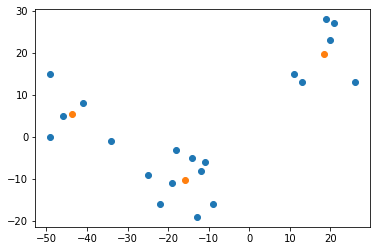

In [87]:
"""
Examples
"""

inputs_cluster = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

# plot points
inputs_cluster_np = np.array(inputs_cluster)
plt.scatter(inputs_cluster_np[:, 0], inputs_cluster_np[:, 1])


clusterer = Kmeans(k=3)
clusterer.EStep(inputs_cluster)

# plot centers
means = np.array(clusterer.means)
plt.scatter(means[:, 0], means[:, 1])



### Choosing K

1it [00:00, 405.21it/s]
2it [00:00, 1861.65it/s]
1it [00:00, 895.26it/s]
1it [00:00, 552.75it/s]
2it [00:00, 1353.87it/s]
4it [00:00, 1882.33it/s]
3it [00:00, 1402.62it/s]
2it [00:00, 836.44it/s]
5it [00:00, 1448.51it/s]
3it [00:00, 1078.41it/s]
2it [00:00, 566.99it/s]
3it [00:00, 733.70it/s]
4it [00:00, 914.34it/s]
2it [00:00, 131.38it/s]
4it [00:00, 768.22it/s]
5it [00:00, 906.09it/s]
2it [00:00, 478.01it/s]
5it [00:00, 912.40it/s]
4it [00:00, 717.90it/s]
6it [00:00, 837.77it/s]
5it [00:00, 453.27it/s]
3it [00:00, 483.16it/s]
5it [00:00, 236.17it/s]
5it [00:00, 565.48it/s]
6it [00:00, 135.92it/s]
6it [00:00, 488.49it/s]
4it [00:00, 435.86it/s]
2it [00:00, 461.57it/s]
5it [00:00, 648.85it/s]
4it [00:00, 199.44it/s]
8it [00:00, 443.63it/s]
4it [00:00, 547.20it/s]
3it [00:00, 149.40it/s]
8it [00:00, 448.96it/s]
7it [00:00, 258.05it/s]
4it [00:00, 318.12it/s]
6it [00:00, 500.08it/s]
2it [00:00, 115.57it/s]
5it [00:00, 288.67it/s]
5it [00:00, 262.19it/s]
6it [00:00, 360.80it/s]
4it [00:00

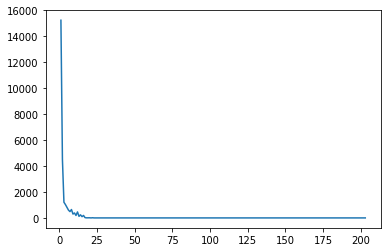

In [98]:
def squared_classify_error(inputs, k):
    clusterer = Kmeans(k)
    clusterer.EStep(inputs)
    
    assignments = [ clusterer.classify(p) for p in inputs ]

    return sum( squared_distance(p, clusterer.means[assignment]) for p, assignment in zip(inputs, assignments) )


ks = range(1, len(inputs) + 1)
errors = [ squared_classify_error(inputs_cluster, i) for i in ks ]
plt.plot(ks, errors)

### Image Segmentation

(512, 512, 3)

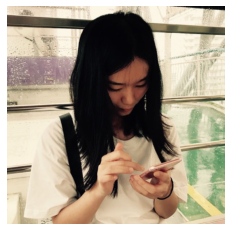

In [101]:
image_path = r"IMG_3400.JPG"    # wherever your image is

img = mpimg.imread(image_path) / 256  # rescale to between 0 and 1
plt.imshow(img)
plt.axis('off')

img.shape

In [91]:
pixels = [ pixel.tolist() for row in img for pixel in row ]

cluterer_image = Kmeans(6)
cluterer_image.EStep(pixels)


44it [02:27,  3.36s/it]


In [92]:
def recolor(pixel):
    """
    Construct a new image with the same format
    """
    cluster_index = cluterer_image.classify(pixel)
    return cluterer_image.means[cluster_index]

(-0.5, 511.5, 511.5, -0.5)

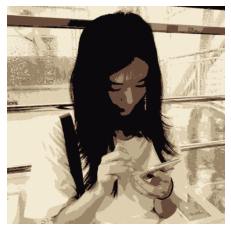

In [96]:
new_img = [ [ recolor(pixel) for pixel in row ] for row in img ]

plt.imshow(new_img)
plt.axis('off')


### Hierarchical Clustering

## 9. PCA

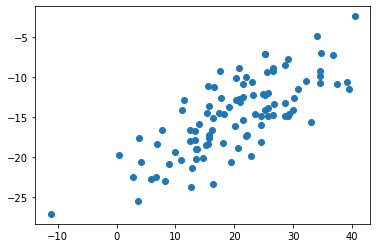

In [87]:

pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

np_pca_data = np.array(pca_data)
plt.scatter(np_pca_data[:, 0], np_pca_data[:, 1])


In [88]:
def direction(w):
    """
    for a given direction d(a vector of magnitude 1)
    """
    mag = magnitude(w)
    return [ w_i / mag for w_i in w ]


def directional_variance(data, w):
    """
    maximize the variance
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir)**2 for v in data)


def directional_variance_gradient(data, w):
    """
    the gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [ sum(2 * dot(v, w_dir) * v[i] for v in data) for i in range(len(w)) ]


def first_principal_component(data, n=100, step_size=0.1):
    guess = [1 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient_step(guess, directional_variance_gradient(data, guess), step_size)
            t.set_description(f"dv: {dv: .3f}")

    return direction(guess)


dv:  8893.505: 100%|██████████| 100/100 [00:00<00:00, 300.08it/s]


[0.7071067811865475, 0.7071067811865475]


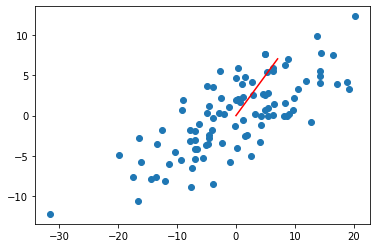

In [89]:

mean_pca_data = vector_mean(pca_data)
de_mean_pca_data = [ v_subtract(v, mean_pca_data) for v in pca_data ]

# plot
np_de_mean_pca_data = np.array(de_mean_pca_data)
plt.scatter(np_de_mean_pca_data[:, 0], np_de_mean_pca_data[:, 1])


# the first component
pca_w1 = first_principal_component(de_mean_pca_data)
plt.plot([0, pca_w1[0] * 10], [0, pca_w1[1] * 10], c='r')


print(pca_w1)

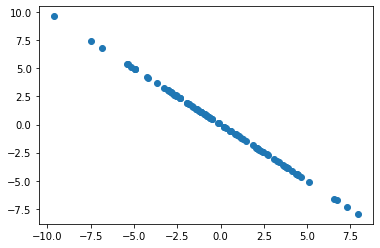

In [90]:
def project(v, w):
    """
    Project vector v on the direction of w
    """
    projection_len = dot(v, w)
    
    # represent in original basis
    return scalar_multiply(projection_len, w)
    

def remove_projection_from_vector(v, w):
    return v_subtract(v, project(v, w))
    
    
def remove_projection(data, w):
    return [ remove_projection_from_vector(v, w) for v in data ]


# remove the first component
pca_data_remain = remove_projection(de_mean_pca_data, pca_w1)
np_pca_data_remain = np.array(pca_data_remain)
plt.scatter(np_pca_data_remain[:, 0], np_pca_data_remain[:, 1])


In [91]:
def pca(data, num_components):
    components = []

    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

def transform_vector(v, components):
    return [ dot(v, w) for w in components ]


def transform_data(data, components):
    return [transform_vector(v, components) for v in data ]

dv:  0.000: 100%|██████████| 100/100 [00:00<00:00, 336.04it/s]


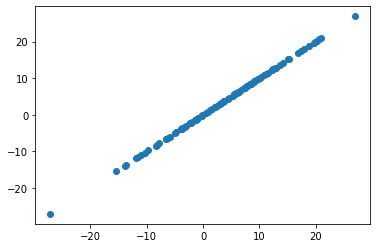

In [102]:
basis_pca_data = pca(pca_data, 2)

np_basis_pca_data = np.array(transform_data(pca_data, basis_pca_data))

plt.scatter(np_basis_pca_data[:, 0], np_basis_pca_data[:, 1])


## 10. Neural Network

### Perceptron

In [142]:
"""
The simplest neural network:

approximates one neuron with n inputs

It computes a weighted sum of its inputs and “fires” if that weighted sum is 0 or greater
"""

def p_step_function(y):
    return 1 if y > 0 else 0


def perceptron_output(w, x):
    return p_step_function(dot(w, x))


In [148]:
"""
Example: AND gate
"""

and_weights = [-3, 2, 2]

assert perceptron_output(and_weights, [1, 1, 1]) == 1
assert perceptron_output(and_weights, [1, 0, 1]) == 0
assert perceptron_output(and_weights, [1, 1, 0]) == 0
assert perceptron_output(and_weights, [1, 0, 0]) == 0
  
or_weights = [-1, 2, 2]

assert perceptron_output(or_weights, [1, 1, 1]) == 1
assert perceptron_output(or_weights, [1, 0, 1]) == 1
assert perceptron_output(or_weights, [1, 1, 0]) == 1
assert perceptron_output(or_weights, [1, 0, 0]) == 0
 

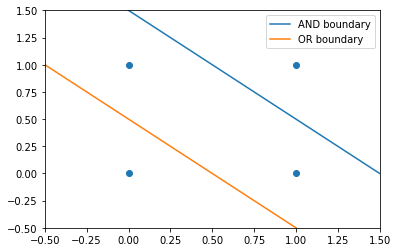

In [167]:
fig, ax = plt.subplots()

ax.scatter([1, 0, 1, 0], [1, 1, 0, 0])
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(-0.5, 1.5)

ts = np.linspace(-.5, 1.5, 20)
ax.plot(ts, (-3+ 2*ts) / -2, label="AND boundary")
ax.plot(ts, (-1+ 2*ts) / -2, label="OR boundary")

ax.legend()

### Feed-Forward Neural Networks

In [168]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))


"""
a neural network is a list (layers) of lists (neurons) of vectors (weights)
"""
def feed_forward(network, input_vector):
    outputs = []

    for layer in network:
        input_i = input_vector + [1]

        output = [ neuron_output(neuron, input_i) for neuron in layer ]
        outputs.append(output)
        
        input_vector = output

    return outputs

In [170]:
"""
XOR Gate
"""
xor_network = [# hidden layer
               [[20., 20, -30],      # 'and' neuron
                [20., 20, -10]],     # 'or'  neuron
               # output layer
               [[-60., 60, -30]]]    # '2nd input but not 1st input' neuron

assert 0.000 < feed_forward(xor_network, [0, 0])[-1][0] < 0.001
assert 0.999 < feed_forward(xor_network, [1, 0])[-1][0] < 1.000
assert 0.999 < feed_forward(xor_network, [0, 1])[-1][0] < 1.000
assert 0.000 < feed_forward(xor_network, [1, 1])[-1][0] < 0.001

### Backpropagation

In [208]:
def sqerror_gradient(network, input_vectors, target_vectors):
    """
    Given a neural network, an input vector, and a target vector,
    make a prediction and compute the gradient of the squared error
    loss with respect to the neuron weights.
    """

    # forward propagate, two layers: [[AND, OR], [output]]
    hidden_outputs, outputs = feed_forward(network, input_vectors)
 
    # gradients with respect to output neuron pre-activation outputs
    output_deltas = [ (output - target) * output * (1 - output) 
                     for output, target in zip(outputs, target_vectors) ]
    
    # gradients with respect to output neuron weights
    output_gradient =  [ 
        [ output_deltas[i] * hidden_output for hidden_output in hidden_outputs + [1] ]
       for i, _ in enumerate(network[-1])]
               
    # gradients with respect to hidden neuron pre-activation outputs
    hidden_deltas = [ 
        hidden_output * ( 1 - hidden_output ) * dot(output_deltas, [n[i] for n in network[-1]])
        for i, hidden_output in enumerate(hidden_outputs)] 
    
    # gradients with respect to hidden neuron weights
    hidden_gradient = [[ hidden_deltas[i] * input_i for input_i in input_vectors + [1] ] 
                       for i, _ in enumerate(network[0])]

    return [ hidden_gradient, output_gradient ]
    

In [211]:
"""
Example: 
"""

random.seed(0)

# training data
nn_xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
nn_ys = [[0.], [1.], [1.], [0.]]

# start with random weights
nn_network = [ 
    # hidden layer: 2 inputs -> 2 outputs
    [
        [random.random() for _ in range(2 + 1)],   # 1st hidden neuron
        [random.random() for _ in range(2 + 1)]
    ],  # 2nd hidden neuron
    
    # output layer: 2 inputs -> 1 output
    [[random.random() for _ in range(2 + 1)]]   # 1st output neuron
]
nn_learning_rate = 1

for epoch in tqdm.trange(20000, desc="neural net for xor"):
    for x, y in zip(nn_xs, nn_ys):
        gradients = sqerror_gradient(nn_network, x, y)
        
        # Take a gradient step for each neuron in each layer
        nn_network = [[gradient_step(neuron, grad, nn_learning_rate)
                    for neuron, grad in zip(layer, layer_grad)]
                   for layer, layer_grad in zip(nn_network, gradients)]

nn_network

neural net for xor: 100%|██████████| 20000/20000 [00:02<00:00, 8709.08it/s] 


[[[6.953505610104289, 6.952785792366962, -3.1484761965046655],
  [5.115899442661922, 5.115407875835949, -7.839603434415663]],
 [[10.961705832630562, -11.63060534664317, -5.1442290566130815]]]

## 11. Machine Learning

### Train-test-split

In [66]:
"""
Measure complexity of our model: train data and testing data
"""

def split_data(dataset, prob):
    data_copy = dataset[:]

    random.shuffle(data_copy)
    
    cut = int(len(dataset) * prob)

    return data_copy[:cut], data_copy[cut:]


def train_test_split(xs, ys, prob):
    """
    Paired input variables and output variables
    """

    lens = [ i for i in range(len(ys))]
    
    train_index, test_index = split_data(lens, 1 - prob)
    
    return ([ xs[i] for i in train_index ], 
            [ ys[i] for i in train_index ], 
            [ xs[i] for i in test_index ], 
            [ ys[i] for i in test_index ])

xs = [ x for x in range(1000)]
ys = [ 2*x for x in xs]
X_train, y_train, X_test, y_test = train_test_split(xs, ys, 0.25)

assert len(X_train) == len(y_train) == 750
assert len(X_test) == len(y_test) == 250

### Metrics

In [71]:
"""
Metrics
"""

def accuracy(tp, fp, fn, tn):
    """
    the faction of correct predictions
    """
    return (tp + tn) / (tp + fp + fn + tn)



def precision(tp, fp, fn, tn):
    """
    how accurate our positive predictions were:
    """
    return tp / (tp + fp)


def recall(tp, fp, fn, tn):
    """
    the fraction of the positives that our model identified
    """
    return tp / (tp + fn)

### Bias-variance tradeoff

### Standardization

In [136]:
"""
Many techniques are sensitive to the scale of your data.

The following example illustrates this problem: changing units might change results

The solution is to rescale to remove unit ( standard deviation from the mean )
"""

a_to_b = distance([63, 150], [67, 160])        # 10.77
a_to_c = distance([63, 150], [70, 171])        # 22.14
b_to_c = distance([67, 160], [70, 171])        # 11.40


# for b, a is the closet neighbour 
a_to_b, a_to_c, b_to_c


(10.770329614269007, 22.135943621178654, 11.40175425099138)

In [137]:
a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37

# for b, c is the closet neighbour 
a_to_b, a_to_c, b_to_c


(14.284257068535268, 27.52889391167034, 13.370115930686627)

In [ ]:
def scale(xs_vectors):
    dim = len(xs_vectors[0])
    v_stdevs = [ std_dev(v[k] for v in xs_vectors)  for k in range(dim) ]

    v_means = vector_mean(xs_vectors)

    return v_means, v_stdevs


In [138]:
v_m_means, v_s_stdevs = scale([[-3, -1, 1], [-1, 0, 1], [1, 1, 1]])

assert v_m_means == [-1, 0, 1]
assert v_s_stdevs == [2, 1, 0]

In [ ]:
def rescale(xs):
    v_m_means, v_s_stdevs = scale(xs)

    dim = len(xs[0])

    rescaled = [ v[:] for v in xs]
    
    for v in rescaled:
        for k in range(dim):
            if v_s_stdevs[k] > 0:
                v[k] = (v[k] - v_m_means[k]) / v_s_stdevs[k]

    return rescaled
    

In [139]:
tmeans, tstdevs = scale(rescale([[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]))
assert tmeans == [0, 0, 1]
assert tstdevs == [1, 1, 0]


## 12. Decision Tree

## 13. Deep Learning

## 14. NLP

## 15. Recommender Systems

In [308]:
"""
Example
"""
users_interests = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

flatten_interests = [ interest for interest_row in users_interests 
                     for interest in interest_row ]

unique_interests = np.unique(flatten_interests)



### Recommend Popular 

In [309]:
"""
One wasy approach is to simply recommend what's popular
"""

popular_interests = Counter(flatten_interests)

def most_popular_suggest(data, max_length):
    suggests = [ 
        (interest, frequency) 
        for interest, frequency in popular_interests.most_common()
        if interest not in data
    ]

    return suggests[:max_length]
    
most_popular_suggest(users_interests[0], 5)


[('Python', 4),
 ('R', 4),
 ('statistics', 3),
 ('regression', 3),
 ('probability', 3)]

### User-Based Collaborative Filtering

In [290]:
"""
Methodology:
    Look for users who are somehow similar to her, 
    and then suggest the things that those users are interested in.
    So we have to find was to measure how similar the two uses are.

Representation(1-of-K):
    v[i] will be 1 if the user specified the ith interest, and 0 otherwise.

"""


user_interest_vector = [ 
    [ 1 if item in user else 0 for item in unique_interests ] 
    for user in users_interests]


# calculate similarity among train data
def cosine_similarity(v1, v2):
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))

user_similarity = [
    [cosine_similarity(user_i, user_j) for user_i in user_interest_vector]
    for user_j in user_interest_vector
]


def most_similar_user_to(user_id):
    similar_list = [ 
        (id, similarity) for id, similarity in enumerate(user_similarity[user_id])
        if id != user_id and similarity > 0 
    ]

    return sorted(similar_list, key=lambda pair: pair[-1], reverse=True)
    


len(unique_interests), unique_interests, len(user_similarity), len(user_similarity[0]),  


(36,
 array(['Big Data', 'C++', 'Cassandra', 'HBase', 'Hadoop', 'Haskell',
        'Java', 'Mahout', 'MapReduce', 'MongoDB', 'MySQL', 'NoSQL',
        'Postgres', 'Python', 'R', 'Spark', 'Storm',
        'artificial intelligence', 'databases', 'decision trees',
        'deep learning', 'libsvm', 'machine learning', 'mathematics',
        'neural networks', 'numpy', 'pandas', 'probability',
        'programming languages', 'regression', 'scikit-learn', 'scipy',
        'statistics', 'statsmodels', 'support vector machines', 'theory'],
       dtype='<U23'),
 15,
 15)

In [300]:

def user_based_suggestion(user_id, include_current_interests=True):
    """
    For each interest, add up the user similarities of the other users interested in it
    """

    suggestion = {}
    other_similar_people = most_similar_user_to(user_id)
    
    for id, similarity in other_similar_people:
        for interest in users_interests[id]:
            if interest not in suggestion:
                suggestion[interest] = 0

            suggestion[interest] += similarity
    
    # Convert them to a sorted list.
    suggestion = sorted(suggestion.items(),
                         key=lambda pair: pair[-1],  # weight
                         reverse=True)

    if include_current_interests:
        return suggestion
    else:
        return [(sugg, weight) for sugg, weight in suggestion
            if sugg not in users_interests[user_id]]


user_based_suggestion(0, False)

[('MapReduce', 0.5669467095138409),
 ('MongoDB', 0.50709255283711),
 ('Postgres', 0.50709255283711),
 ('NoSQL', 0.3380617018914066),
 ('neural networks', 0.1889822365046136),
 ('deep learning', 0.1889822365046136),
 ('artificial intelligence', 0.1889822365046136),
 ('databases', 0.1690308509457033),
 ('MySQL', 0.1690308509457033),
 ('Python', 0.1543033499620919),
 ('R', 0.1543033499620919),
 ('C++', 0.1543033499620919),
 ('Haskell', 0.1543033499620919),
 ('programming languages', 0.1543033499620919)]

### Item-Based Collaborative Filtering

In [318]:
"""
suggest items for each user by aggregating interests that are similar to her current interests
"""

# first transpose user-interest-vector matrix
interest_user_matrix = [
    [ row[i] for row in user_interest_vector ]
    for i in range(len(user_interest_vector[0]))]


item_similarity = [
    [cosine_similarity(item_i, item_j) for item_i in interest_user_matrix]
    for item_j in interest_user_matrix
]

def most_similar_to_item(interest_id):    
    similar_list = [ 
        (unique_interests[id], similarity) 
        for id, similarity in enumerate(item_similarity[interest_id])
        if id != interest_id and similarity > 0 
    ]

    return sorted(similar_list, key=lambda pair: pair[-1], reverse=True)


most_similar_to_item(0)

[('Hadoop', 0.8164965809277261),
 ('Java', 0.6666666666666666),
 ('MapReduce', 0.5773502691896258),
 ('Spark', 0.5773502691896258),
 ('Storm', 0.5773502691896258),
 ('Cassandra', 0.4082482904638631),
 ('artificial intelligence', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('neural networks', 0.4082482904638631),
 ('HBase', 0.3333333333333333)]

In [335]:
def item_based_suggestion(user_id, include_current_interests=True):
    interests_of_user = users_interests[user_id]

    suggestions = {}
    
    for interest in interests_of_user: 
        interest_id = unique_interests.tolist().index(interest)

        for interest, similarity in most_similar_to_item(interest_id):
            if interest not in suggestions:
                suggestions[interest] = 0
            
            suggestions[interest] += similarity

    suggestions = sorted(suggestions.items(), key=lambda pair: pair[-1], reverse=True)

    if include_current_interests:
        return suggestions
    else:
        return [(suggestion, weight)
                for suggestion, weight in suggestions
                if suggestion not in users_interests[user_id]]

item_based_suggestion(0, False)

[('MapReduce', 1.861807319565799),
 ('MongoDB', 1.3164965809277263),
 ('Postgres', 1.3164965809277263),
 ('NoSQL', 1.2844570503761732),
 ('MySQL', 0.5773502691896258),
 ('databases', 0.5773502691896258),
 ('Haskell', 0.5773502691896258),
 ('programming languages', 0.5773502691896258),
 ('artificial intelligence', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('neural networks', 0.4082482904638631),
 ('C++', 0.4082482904638631),
 ('Python', 0.2886751345948129),
 ('R', 0.2886751345948129)]

### Matrix Factorization

In [59]:
import csv
from typing import NamedTuple

class Rating(NamedTuple):
    user_id: str
    movie_id: str
    rating: int

MOVIES = './data/u.item'
RATINGS = './data/u.data'


with open(MOVIES, encoding="iso-8859-1") as f:
        reader = csv.reader(f, delimiter="|")
        movies = {movie_id: title for movie_id, title, *_ in reader}
        
with open(RATINGS, encoding="iso-8859-1") as f:
        reader = csv.reader(f, delimiter="\t")
        ratings = [Rating(user_id, movie_id, float(rating))
                   for user_id, movie_id, rating, _ in reader]

In [60]:
# 1692 movies rated by 943 users
len(movies), len(ratings), len(set([rating.user_id for rating in ratings]))


(1682, 100000, 943)

In [61]:
movies['242'], ratings[0]

('Kolya (1996)', Rating(user_id='196', movie_id='242', rating=3.0))

In [62]:
"""
Step 1: split data into train, validation, test sets
"""

random.seed(0)
random.shuffle(ratings)
split1 = int(len(ratings) * 0.7)
split2 = int(len(ratings) * 0.85)
train = ratings[:split1]
validation = ratings[split1:split2]
test = ratings[split2:]

In [63]:
"""
Step 2: baseline, SS(mean), the model should do better than this
"""

avg_rating = sum(rating.rating for rating in train) / len(train) 
baseline_error = sum((rating.rating - avg_rating)**2 for rating in test) / len(test)

baseline_error

1.2609526646939684

In [83]:
"""
Step 3: embeddings
"""

# unique id
user_ids = { rating.user_id for rating in ratings }
movie_ids = { rating.movie_id for rating in ratings }

DIM = 2
user_vectors = { user_id: random_tensor(DIM) for user_id in user_ids }
movie_vectors = { movie_id: random_tensor(DIM) for movie_id in movie_ids }

learning_rate = 0.05

# https://developers.google.com/machine-learning/recommendation/collaborative/matrix
def learning(data):
    """
    minimize the objective function using stochastic gradient descent
    """
    loss = 0
    for rating in data:
        movie_vector = movie_vectors[rating.movie_id]
        user_vector = user_vectors[rating.user_id]
        
        predicted = dot(user_vector, movie_vector)
        error = rating.rating - predicted
        loss += error**2

        if learning_rate is not None:
            user_gradient = [ error * w for w in movie_vector ]
            movie_gradient = [ error * u for u in user_vector ]

             # Take gradient steps
            for j in range(DIM):
                user_vector[j] -= learning_rate * user_gradient[j]
                movie_vector[j] -= learning_rate * movie_gradient[j]

    print('avg loss: ', loss / len(data))

for epoch in range(20):
    learning(train)

learning(test)